<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Estat%C3%ADstica_descritiva_EBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução à Estatística Descritiva**

A Estatística Descritiva é uma área fundamental da estatística que se concentra na organização, resumo e interpretação de dados. Ela busca extrair informações úteis e compreensíveis a partir de conjuntos de dados, permitindo uma análise mais eficaz e uma compreensão mais profunda dos fenômenos estudados.

## **Carregando os dados**

Vamos realizar a importação dos dados para que possamos aplicar diferentes tecnicas da estatistica descritiva

In [1]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

Agora que já importamos todas as bibliotecas necessarias vamos importar a base de dados propriamente dita

In [4]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/house_price.csv')

Agora que já carregamos a base de dados vamos ter um primeiro contato com esses dados

In [5]:
# Observando os primeiros registros
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


Vemos diversas variaveis aqui, que até o momento não sabemos do que se trata então vamos observar o dicionario de dados

- SalePrice: Price of sale
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GrLivArea: Above grade (ground) living area square feet
- TotalBsmtSF: Total square feet of basement area

- YearBuilt: Original construction date

- MSZoning - Identifies the general zoning classification of the sale
  - A    Agriculture
  - C    Commercial
  - FV    Floating Village Residential
  - I     Industrial
  - RH    Residential High Density
  - RL    Residential Low Density
  - RP    Residential Low Density Park
  - RM    Residential Medium Density

- Utilities: Type of utilities available
 - AllPub    All public Utilities (E,G,W,& S)    
 - NoSewr    Electricity, Gas, and Water (Septic Tank)
 - NoSeWa    Electricity and Gas Only
 - ELO       Electricity only    

- BldgType: Type of dwelling
 - 1Fam      Single-family Detached    
 - 2FmCon    Two-family Conversion; originally built as one-family dwelling
 - Duplx     Duplex
 - TwnhsE    Townhouse End Unit
 - TwnhsI    Townhouse Inside Unit

## **Medidas de Tendência Central**

- Média: Representa o valor médio de um conjunto de dados.
- Mediana: O valor que divide o conjunto de dados ao meio quando ordenado.
- Moda: O valor mais frequente em um conjunto de dados.

Vamos observar como conseguir cada uma dessa medidas, mas antes vamos obsrrvar novamente como estão nossos dados

In [6]:
# Observando os primeiros registros
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


Vamos observar a méida, mediana e moda da variavel 'SalePrice'

In [7]:
# Calculando a média
mean = df['SalePrice'].mean()

# Calculando a mediana
median = df['SalePrice'].median()

# Calculando a moda
mode = df['SalePrice'].mode()

print(f"Média: {mean}\nMediana: {median}\nModa {mode}")

Média: 180921.19589041095
Mediana: 163000.0
Moda 0    140000
Name: SalePrice, dtype: int64


Dessa forma podemos perceber que a média do preço de venda foi de 180k, enquanto a mediana é de 163k, isso pode indicar que os dados não estão muito assimetricos, provavelmente exitiram algumas poucas vendas com valores mais altos isso esta consequentemente jogando a média mais para cima, vamos observar isso mais a fundo

## **Medidas de Posição Relativa**

- **Percentis:** Dividem os dados em percentagens, indicando a posição relativa de um valor.

  - 25º percentil: 25% dos dados são menores que ou iguais a este valor.

  - 50º percentil: A mediana. 50% dos dados são menores que ou iguais a este valor.

  - 75º percentil: 75% dos dados são menores que ou iguais a este valor.


- **Quartis:** Dividem os dados em quatro partes iguais, fornecendo informações sobre a dispersão.

  - 1º quartil (Q1):	25% dos dados são menores que ou iguais a este valor.

  - 2º quartil (Q2):	A mediana. 50% dos dados são menores que ou iguais a este valor.

  - 3º quartil (Q3):	75% dos dados são menores que ou iguais a este valor.

Vamos utilizar o boxplot para investigarmos os quartis

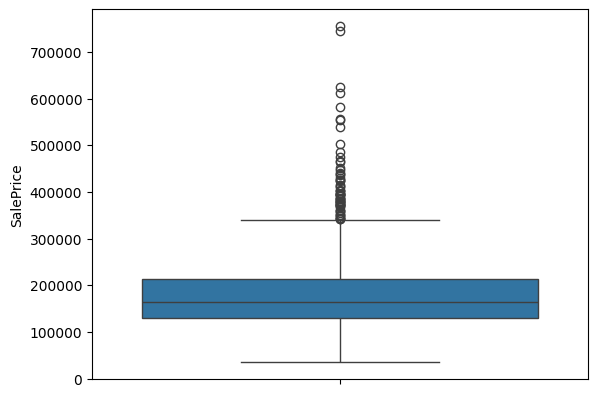

In [15]:
# Criando o boxplot
sns.boxplot(df['SalePrice']);

Com esse gráfico podemos confirmar nossa suspeita de que aquela disparidade entre a média e a mediana deve-se por conta de outliers que estão fazendo com que a média aumente, vamos observar mais algumas medidas

In [17]:
# Observando algumas medidas
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Podemos observar nesse momento que existem casas sendo vendidas a 34k enquanto outras estão sendo vendidas a 755k, indicando assim uma alta amplitude

In [ ]:
# Continua!!!